In [1]:
%run '../src/imports.py'

✅ Окружение готово!


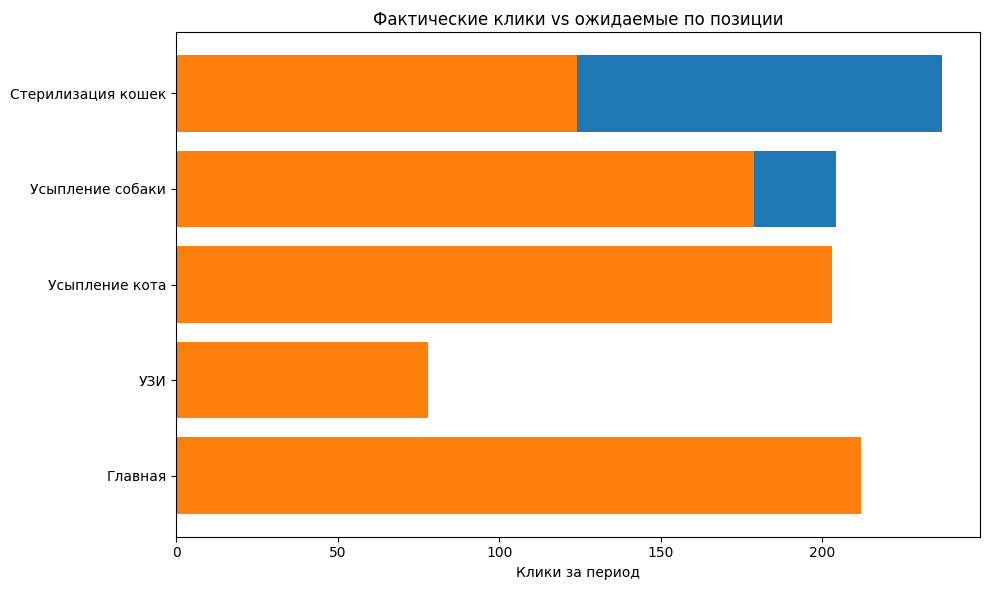

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример данных (можно заменить на CSV из GSC)
data = [
    ['Стерилизация кошек', 9.94, 9478, 124],
    ['Усыпление собаки', 7.92, 8174, 179],
    ['Усыпление кота', 8.92, 5609, 203],
    ['Главная', 16.95, 6717, 212],
    ['УЗИ', 18.98, 1150, 78],
]

df = pd.DataFrame(data, columns=[
    'page', 'position', 'impressions', 'clicks'
])

# Бенчмарк CTR
def expected_ctr(pos):
    if pos <= 1: return 0.25
    if pos <= 2: return 0.14
    if pos <= 3: return 0.09
    if pos <= 5: return 0.045
    if pos <= 10: return 0.025
    if pos <= 20: return 0.012
    return 0.004

df['expected_ctr'] = df['position'].apply(expected_ctr)
df['expected_clicks'] = df['impressions'] * df['expected_ctr']

# Сортируем по потенциалу
df['potential'] = df['expected_clicks'] - df['clicks']
df = df.sort_values('potential', ascending=False)

# ──── Визуализация ─────────────────────────────
plt.figure(figsize=(10, 6))

plt.barh(df['page'], df['expected_clicks'])
plt.barh(df['page'], df['clicks'])

plt.xlabel('Клики за период')
plt.title('Фактические клики vs ожидаемые по позиции')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
